In [41]:
import os
import numpy
import matplotlib.pyplot as plt
from vtk import vtkStructuredPointsReader
from vtk.util import numpy_support as VN
from PIL import Image
from scipy.ndimage import imread



In [34]:
def save_3d_array_as_multitiff(array, file_name):

    imlist = list(array)
    imlist[0].save(file_name, save_all=True, append_images=imlist[1:])
    
def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

In [30]:
path = '/Users/olesia/data/sprays/simulation/'
filename = 'out_13.vtk'

In [3]:

reader = vtkStructuredPointsReader()
reader.SetFileName(path + filename)
reader.ReadAllVectorsOn()
reader.ReadAllScalarsOn()
reader.Update()

data = reader.GetOutput()



In [5]:
dim = data.GetDimensions()
vec = list(dim)
vec = [i-1 for i in dim]
vec.append(3)

print dim
print list(dim)

(251, 251, 251)
[251, 251, 251]


In [47]:
data_vars = [
    ('Density', 'den'),
    ('Velocity', 'amp'),
    ('Liq_Mass_Frac', 'liq_mass_frac'),
    ('Liq_Vol_Frac', 'liq_vol_frac')
] 

In [26]:
print dim
print data.GetNumberOfPoints()
d = data.GetPoint(0)

d=data.GetPointData()
print d

array=d.GetArray('Density')

print array

#print reader.GetNumberOfScalarsInFile() # get number of scalars

#print reader.GetScalarsNameInFile(1) # get scalar name string


(251, 251, 251)
15813251
vtkPointData (0x7fb8d3f2ddd0)
  Debug: Off
  Modified Time: 478
  Reference Count: 2
  Registered Events: 
    Registered Observers:
      vtkObserver (0x7fb8d3f2ded0)
        Event: 33
        EventName: ModifiedEvent
        Command: 0x7fb8d3f2f770
        Priority: 0
        Tag: 1
  Number Of Arrays: 6
  Array 0 name = Velocity
  Array 1 name = Density
  Array 2 name = Liq_Mass_Frac
  Array 3 name = Liq_Vol_Frac
  Array 4 name = vtkValidPointMask
  Array 5 name = vtkGhostType
  Number Of Components: 8
  Number Of Tuples: 15813251
  Copy Tuple Flags: ( 1 1 1 1 1 0 1 1 )
  Interpolate Flags: ( 1 1 1 1 1 0 0 1 )
  Pass Through Flags: ( 1 1 1 1 1 1 1 1 )
  Scalars: (none)
  Vectors: (none)
  Normals: (none)
  TCoords: (none)
  Tensors: (none)
  GlobalIds: (none)
  PedigreeIds: (none)
  EdgeFlag: (none)


vtkFloatArray (0x7fb8d63b2620)
  Debug: Off
  Modified Time: 429
  Reference Count: 2
  Registered Events: (none)
  Name: Density
  Data type: float
  Size: 15

In [27]:
d = VN.vtk_to_numpy(array)
d = d.reshape(dim,order='F')


In [46]:



dataset = '01'

for z in range(dim[0]):
    img = Image.fromarray(d[z])
    output_path = path + dataset + '_den/' 
    ensure_dir(output_path)
    img.save(output_path + "vol" + str(z).zfill(3) + ".tiff")
        

/Users/olesia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


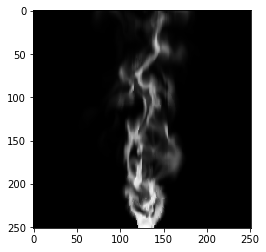

In [45]:
im = imread(output_path + 'vol100.tiff')

plt.imshow(im, cmap='gray')
plt.show()